**Analyzing** **data** **gotten** **from** **certain** **Jambites**

The dataset to be analyzed in this notebook was a product of a Google Form questionnaire produced by the Deeper Life Campus Fellowship FUTA chapter academic group for the Jambites who were aspiring to gain admission into FUTA. This was to prepare them for their forthcoming post utme. The goal of this analysis is to determine the factors that affect a student's jamb score.


In [25]:
#import all necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The first step is to import all necessary modules, as we've seen from above. Then, load the dataset as a dataframe and view the all important information in the data.

In [26]:
#load the dataset
df = pd.read_csv("/content/DLCF FUTA Aspirants Bio-Data & Advisory Form (Responses) - Form Responses 1 (1).csv")
display(df.head())
df.info()

,Timestamp,Email Address,First Name,Other Names,State of Residence,Sex,Mobile Number (Preferably WhatsApp),Denomination,School/Faculty Applied For,Course/Department Applied For,Jamb Score,Jamb Subject Combination,Did you register for the upcoming NECO exams scheduled to start October?,Have you completed the online registration for the Post Utme Exam?,What challenge(s) are/were you faced with during the cause of application and registration?,How can we help you?,What are your expectations from DLCF FUTA as regards your preparations for the Post Utme Test?
0,10/10/2020 22:26:42,akinwamideelijah@gmail.com,Elijah,Akinwamide,Ogun,Male,9093934248,Deeper Life Bible Church,School of Environmental Technology (SET),Architecture,263,"English, Mathematics, Physics, Geography",Yes,Yes,No challenge free flow,Just gaining of admission,Tutoring
1,10/11/2020 8:59:25,ajayisegunsamuel2002@gmail.com,Olusegun,Samuel,Lagos,Male,8026132149,Deeper Life Bible Church,School of Engineering and Engineering Technolo...,Electrical electronics engineering,229,"English, Mathematics, Chemistry, Physics",No,Yes,Discouragement concerning my course and depres...,"Academically, spiritually and financially",Updates on vital informations and a place to s...
2,10/11/2020 10:25:57,akintundeakinba@gmail.com,Akinbamowo,Akintunde,Ondo,Male,7041722776,Deeper Life Bible Church,School of Engineering and Engineering Technolo...,Software engineering,187,"English, Mathematics, Chemistry, Physics",No,Yes,No challenge,Tutoring,Helping me with reading and teaching sir/ma
3,10/11/2020 15:09:46,johnsonchidinma304@gmail.com,Johnson,Chidinma joy,Lagos,Female,8068317222,Deeper Life Bible Church,School of Sciences (SOS),Mathematics,225,"English, Mathematics, Chemistry, Physics",No,In Progress,I registered using my phone but i am finding i...,If I can be link to where I can pay for the form,I expect the DLCF FUTA to send past questions ...
4,10/11/2020 16:31:26,arewaolawale2@gmail.com,Arewa,Olawale,Ondo,Male,8086830091,Deeper Life Bible Church,School of Computing (SOC),Computer Science,273,"English, Mathematics, Chemistry, Physics",No,In Progress,Financial challenges,Prayer,Companion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 17 columns):
 #   Column                                                                                          Non-Null Count  Dtype 
---  ------                                                                                          --------------  ----- 
 0   Timestamp                                                                                       71 non-null     object
 1   Email Address                                                                                   71 non-null     object
 2   First Name                                                                                      71 non-null     object
 3   Other Names                                                                                     71 non-null     object
 4   State of Residence                                                                              71 non-null     object
 5   Sex                     

Before analyzing, it is important to check if there are null values in the data.

In [27]:
#check for any null values
df.isna().sum()

Timestamp                                                                                         0
Email Address                                                                                     0
First Name                                                                                        0
Other Names                                                                                       0
State of Residence                                                                                0
Sex                                                                                               0
Mobile Number (Preferably WhatsApp)                                                               0
Denomination                                                                                      0
School/Faculty Applied For                                                                        0
Course/Department Applied For                                                                     0


As seen from above, all the columns are void of null values. Now, the timestamp column has to be converted to a datetime column so that the year, month , day and time can be extracted.

In [28]:
#convert the timestamp column to a datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Year"] = df["Timestamp"].dt.year #create a column for the year
df["Month"] = df["Timestamp"].dt.strftime('%B') #create a column for the month
df["Day"] = df['Timestamp'].dt.strftime('%A') #create a column for the day
df["Time"] = df['Timestamp'].dt.strftime('%H-%M-%S') #create a column for the time
display(df['Year'].value_counts())
display(df['Month'].value_counts())
display(df['Day'].value_counts())



2020    57
2021    14
Name: Year, dtype: int64

October     31
November    26
January     14
Name: Month, dtype: int64

Friday       20
Sunday       15
Wednesday    13
Monday       10
Saturday      7
Thursday      4
Tuesday       2
Name: Day, dtype: int64

As seen from the above extraction, the data was collected around the last quarter of 2020 to early 2021. 
Now, the data has to be cleaned thoroughly before it can be analyzed, since it is a real-world data.

**Data** **cleaning**

In [29]:
#clean the state of residence column
display(df['State of Residence'].value_counts())#before cleaning
df['State of Residence'] = df['State of Residence'].str.capitalize()
df['State of Residence'] = df['State of Residence'].str.strip(' ')
df['State of Residence'] = df['State of Residence'].replace({'Ondo state':'Ondo', 'Oyo state':'Oyo', 'Lagos state':'Lagos', 'Osun state':'Osun', 'Ogun state':'Ogun', 'Ekiti state':'Ekiti', 'Kwara state':'Kwara', 'Ilesha':'Osun', 'Ogum':'Ogun', 'Rivers state':'Rivers', 'Ifo ogun state':'Ogun', 'Ondostate':'Ondo', 'Ondo state akure':'Ondo', 'Oke aro akure':'Ondo','Tipper garage mowe-ofada, ogun state':'Ogun'})
df['State of Residence'].value_counts()#after cleaning




Lagos                                   15
Ondo state                              10
Ondo                                     6
Oyo state                                3
Oyo                                      3
Ekiti                                    3
Osun state                               2
Osun                                     2
Lagos                                    2
Ogun                                     2
Lagos state                              2
Ekiti state                              1
Tipper Garage mowe-ofada, ogun state     1
Ilesha                                   1
Oke aro akure                            1
Benin Republic                           1
Ondostate                                1
Rivers State                             1
Ekiti State                              1
Ondo state Akure                         1
Ogun state                               1
Abuja                                    1
Ogum                                     1
Kogi       

Lagos             20
Ondo              20
Ogun               7
Oyo                7
Osun               5
Ekiti              5
Kwara              2
Kogi               2
Abuja              1
Benin republic     1
Rivers             1
Name: State of Residence, dtype: int64

Now that the state of residence column is now clean, we can visualize the most frequent state.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


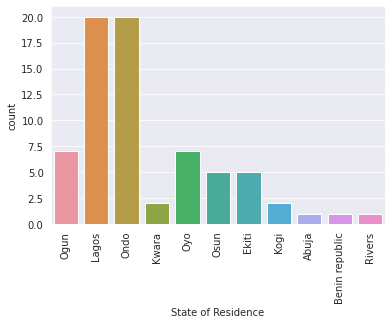

In [30]:
sns.set_style('darkgrid')
sns.countplot('State of Residence', data=df)
plt.xticks(rotation=90)
plt.show()

From the count plot above, it is observed the both Lagos and Ondo are the most frequent states.
Now, for the mobile number column, +234 needs to be added in order to make the phone numbers more accessible

In [31]:
df['Mobile Number (Preferably WhatsApp)'] = df['Mobile Number (Preferably WhatsApp)'].astype(str)
df['Mobile Number (Preferably WhatsApp)'] = '+234' + df['Mobile Number (Preferably WhatsApp)']


In [32]:
#confirm that all phone numbers are valid
y = df[df['Mobile Number (Preferably WhatsApp)'].str.len() < 14]
y

,Timestamp,Email Address,First Name,Other Names,State of Residence,Sex,Mobile Number (Preferably WhatsApp),Denomination,School/Faculty Applied For,Course/Department Applied For,...,Jamb Subject Combination,Did you register for the upcoming NECO exams scheduled to start October?,Have you completed the online registration for the Post Utme Exam?,What challenge(s) are/were you faced with during the cause of application and registration?,How can we help you?,What are your expectations from DLCF FUTA as regards your preparations for the Post Utme Test?,Year,Month,Day,Time
55,2020-11-05 12:07:01,nkamapaulinus@gmail.com,Paulinus,Nkama Chikwere,Benin republic,Male,+23490137006,Deeper Life Bible Church,School of Engineering and Engineering Technolo...,Civil engineering,...,"English, Mathematics, Chemistry, Physics",No,Yes,No challenges but after the registration I was...,I want help to retrieve the RRR code,Prayers and good counsel and care,2020,November,Thursday,12-07-01


As seen from above, only one phone number is not valid. But, this row cannot be dropped due to this error. Notice that the student is from Benin Republic, according to research, the NSN length for Benin Republic mobile phone numbers is eight digits and also the country code is +229. Therefore, the +234 should be replaced to +229.

In [44]:
df.iloc[55, 6] = df.iloc[55, 6][4:]
df.iloc[55, 6] = '+229' + df.iloc[55,6]

In [45]:
df.iloc[55, 6]

'+22990137006'

Next, the denomination needs to be appropriately cleaned so that the most frequent denomination can be visualized.

In [33]:

df['Denomination'] = df['Denomination'].str.strip(' ')
df['Denomination'] = df['Denomination'].replace({'CAC':'Christ Apostolic Church', 'Reedeem Christian Church of God':'The Redeemed Christian Church of God', 'Anglican Communion':'Anglican', 'mountain of fire and miracles ministries':'MFM', 'Redeemed Christian Church of God':'The Redeemed Christian Church of God', 'Redeem christian church of God':'The Redeemed Christian Church of God', 'The Redeem Christian Church Of God':'The Redeemed Christian Church of God', 'RCCG':'The Redeemed Christian Church of God', 'C.A.C':'Christ Apostolic Church', 'C&s':'C&S', 'The Apostolic church':'TACN','Tacfon':'TACSFON', 'Christ second Coming Gospel assembly osun state':'Christ\'s Second Coming Gospel Assembly', 'IGEM ccc':'IGEM-CCC', 'Christ apostolic church':'Christ Apostolic Church', 'Apostolic faith church':'Apostolic Faith Church'})
df['Denomination'].value_counts()

Deeper Life Bible Church                       38
The Redeemed Christian Church of God            7
Christ Apostolic Church                         7
TACSFON                                         2
Anglican                                        2
MFM                                             2
TACN                                            2
Winners                                         2
Apostolic Faith Church                          1
C&S                                             1
Catholic Church                                 1
IGEM-CCC                                        1
Christ's Second Coming Gospel Assembly          1
Christ Trumpeters Church                        1
Christian Faith World Outreach Centre (INC)     1
Abundant Grace Ministry Int'l.                  1
Jesus christ life gospel church                 1
Name: Denomination, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


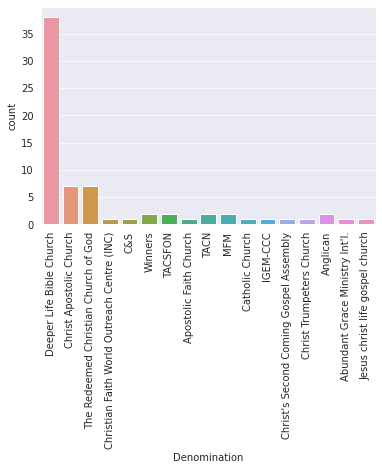

In [34]:
sns.set_style('darkgrid')
sns.countplot('Denomination', data=df)
plt.xticks(rotation=90)
plt.show()

The dirty columns are now clean (the columns asking specific questions are not needed for now).

**Exploratory** **Data** **Analysis**

Now, let's analyze the data. Let's start with students with high jamb scores

In [35]:
df['Jamb Score'].describe()

count     71.000000
mean     230.352113
std       30.173829
min      184.000000
25%      206.500000
50%      222.000000
75%      257.000000
max      294.000000
Name: Jamb Score, dtype: float64

The above series shows that the maximum jamb score in this data is 294, while the minimum is 184. This is expected because the minimum UTME score requirement for FUTA aspirants is 180.

In [36]:
df_high_jamb_score = df[df['Jamb Score'] >= 270]
df_faculty = df_high_jamb_score.groupby('School/Faculty Applied For')['Jamb Score'].count()
display(df_faculty)
df_sex = df_high_jamb_score.groupby('Sex')['Jamb Score'].count()
df_sex

School/Faculty Applied For
School of Computing (SOC)                                  3
School of Engineering and Engineering Technology (SEET)    6
School of Sciences (SOS)                                   1
Name: Jamb Score, dtype: int64

Sex
Female    2
Male      8
Name: Jamb Score, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


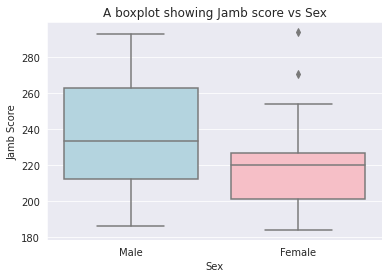

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


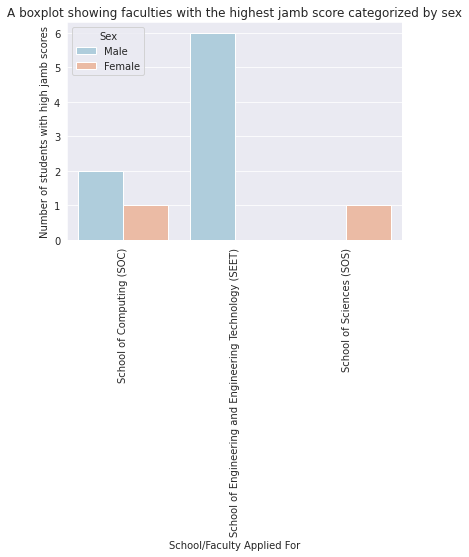

In [46]:
sns.set_style('darkgrid')
sns.boxplot('Sex', 'Jamb Score', data=df, palette=['lightblue', 'lightpink'])
plt.title('A boxplot showing Jamb score vs Sex')
plt.show()
plt.figure()
sns.countplot('School/Faculty Applied For', hue='Sex', data=df_high_jamb_score, palette='RdBu_r')
plt.xticks(rotation=90)
plt.ylabel('Number of students with high jamb scores')
plt.title('A boxplot showing faculties with the highest jamb score categorized by sex')
plt.show()

The outliers in the boxplot for the female students show that two female students had high jamb scores. The two female students can be seen in the second plot. It can also be seen that school of engineering had the highest number of students with high jamb scores. Now, we're going to analyze students with low jamb scores.

In [38]:
df_low_jamb_score = df[df['Jamb Score'] < 200]
df_low_jamb_score

,Timestamp,Email Address,First Name,Other Names,State of Residence,Sex,Mobile Number (Preferably WhatsApp),Denomination,School/Faculty Applied For,Course/Department Applied For,...,Jamb Subject Combination,Did you register for the upcoming NECO exams scheduled to start October?,Have you completed the online registration for the Post Utme Exam?,What challenge(s) are/were you faced with during the cause of application and registration?,How can we help you?,What are your expectations from DLCF FUTA as regards your preparations for the Post Utme Test?,Year,Month,Day,Time
2,2020-10-11 10:25:57,akintundeakinba@gmail.com,Akinbamowo,Akintunde,Ondo,Male,+2347041722776,Deeper Life Bible Church,School of Engineering and Engineering Technolo...,Software engineering,...,"English, Mathematics, Chemistry, Physics",No,Yes,No challenge,Tutoring,Helping me with reading and teaching sir/ma,2020,October,Sunday,10-25-57
17,2020-10-30 15:34:06,Olugbayilagbolahan@gmail.com,Gbolahan,Boluwatife,Ogun,Male,+2347015535719,Winners,School of Engineering and Engineering Technolo...,Industrial production engineering,...,"English, Mathematics, Chemistry, Physics",No,Yes,None,None,Good,2020,October,Friday,15-34-06
18,2020-10-30 15:58:34,taiwodesire2019@gmail.com,Alabe,Taiwo Grace,Ondo,Female,+2349060883428,TACSFON,School of Environmental Technology (SET),Urban and regional planning,...,"English, Mathematics, Physics, Geography",Yes,Yes,No challenges,To be the best,Am expectations is to have the best grades,2020,October,Friday,15-58-34
26,2020-10-30 22:21:29,davidadaramola01@gmail.com,David,Teminijesu,Ondo,Male,+2348119986724,Apostolic Faith Church,School of Computing (SOC),Computer science,...,"English, Mathematics, Chemistry, Physics",Yes,Yes,None,To be a futarian,Excellent results,2020,October,Friday,22-21-29
27,2020-10-30 22:36:33,mideayo306@gmail.com,Akinbo,Favour oluwakemi,Lagos,Female,+2348181276953,TACN,School of Engineering and Engineering Technolo...,Architecture,...,"English, Mathematics, Chemistry, Physics",Yes,No,I haven't done my registration,With my jamb score,Solving post utme past questions together and ...,2020,October,Friday,22-36-33
38,2020-11-02 09:13:40,adamjeremiah7@gmail.com,Adam,Jeremiah,Ondo,Male,+2348034299806,Catholic Church,School of Environmental Technology (SET),Estate management,...,"English, Mathematics, Chemistry, Economics",No,Yes,NO challenge,Advice on this low jamb score,60 points and above,2020,November,Monday,09-13-40
42,2020-11-02 12:57:30,eesuolaoluwatoyin99@gmail.com,Eesuola,Oluwatoyin Rebecca,Oyo,Female,+2348127552328,IGEM-CCC,School of Sciences (SOS),Micro biology,...,"English, Biology, Chemistry, Physics",No,Yes,Network issue\nBut it's fine now,Yeah\nThe question I have is that\nThe name on...,I expect this group to enlighten us on how the...,2020,November,Monday,12-57-30
46,2020-11-04 11:40:50,Aribabainioluwa@gmail.com,Aribaba,Inioluwa,Osun,Male,+2347019926928,Christ Apostolic Church,School of Engineering and Engineering Technolo...,CVE,...,"English, Mathematics, Chemistry, Physics",No,Yes,Nothing much,All the help u can render,More lesson,2020,November,Wednesday,11-40-50
51,2020-11-04 20:00:32,davidbakare87@gmail.com,Bakare,Boluwatife David,Oyo,Male,+2349050314178,TACSFON,School of Sciences (SOS),Statics,...,"English, Mathematics, Chemistry, Physics",Yes,Yes,No challenges,My problem is about the awaiting result of thi...,To put me more on the post utme question.,2020,November,Wednesday,20-00-32
57,2021-01-08 22:17:20,pelumiolorunda35@gmail.com,Olorunda,Pelumi,Ondo,Female,+2347015771258,MFM,School of Engineering and Engineering Technolo...,Building technology,...,"English, Mathematics, Physics, Economics",No,Yes,No challenge,Keep me update about the post utme,They should be training me for the exam,2021,January,Friday,22-17-20


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


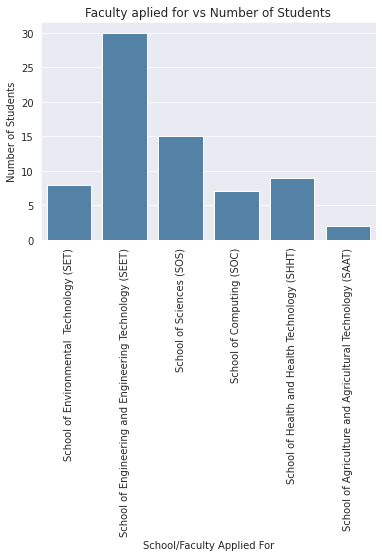

In [39]:
sns.set_style('darkgrid')
sns.countplot('School/Faculty Applied For', data=df, color='steelblue')
plt.title('Faculty aplied for vs Number of Students')
plt.ylabel('Number of Students')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


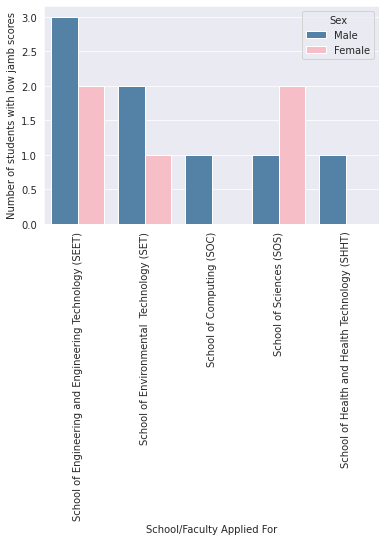

In [47]:
sns.set_style('darkgrid')
sns.countplot('School/Faculty Applied For', hue='Sex', data=df_low_jamb_score, palette=['steelblue','lightpink'])
plt.xticks(rotation=90)
plt.ylabel('Number of students with low jamb scores')
plt.show()

From the above count plot, we can see that school of engineering also has the highest number of students with low jamb scores. Therefore jamb score is not determined by the faculty applied for. It also does not depend on sex as seen with the two female students that had high jamb scores. Let's now check if denomination affects jamb score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


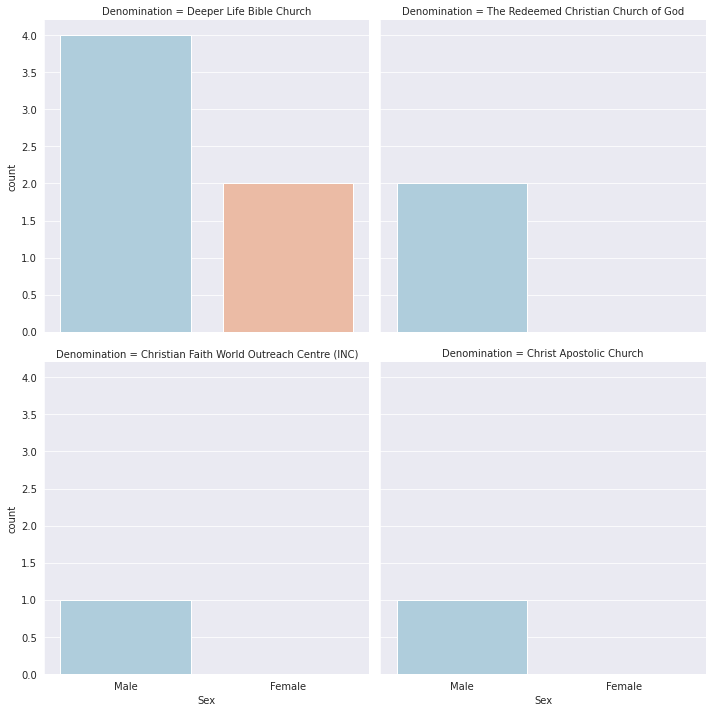

In [41]:
sns.catplot('Sex', kind='count', col='Denomination', col_wrap=2, data=df_high_jamb_score, palette='RdBu_r' )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


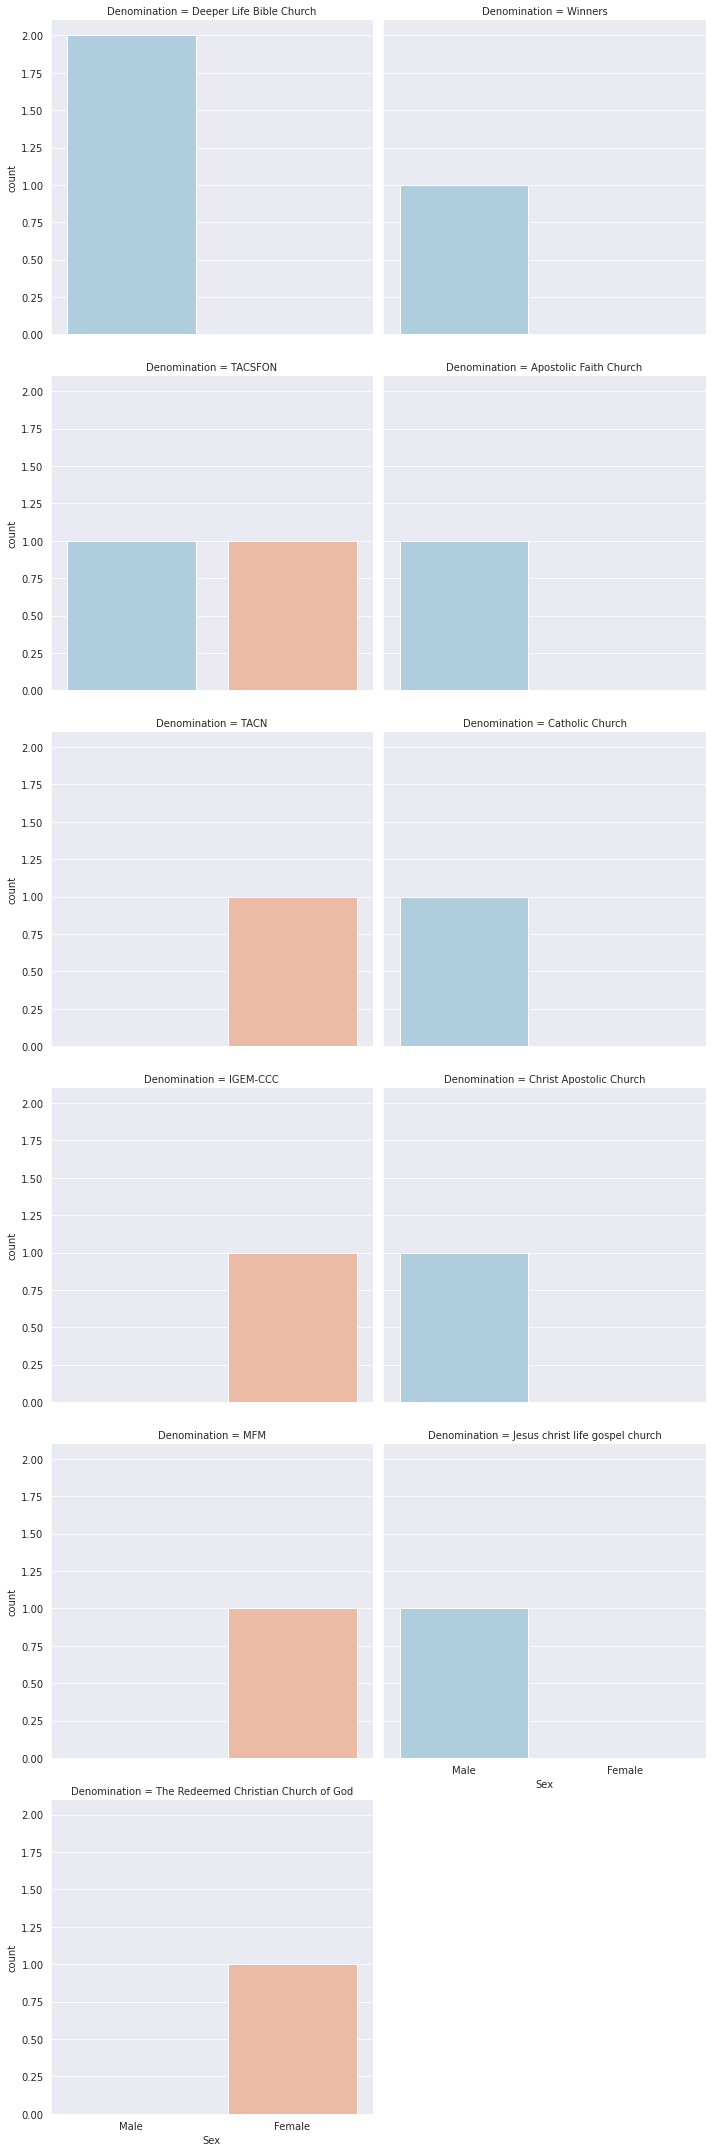

In [42]:
sns.catplot('Sex', kind='count', col='Denomination', col_wrap=2, data=df_low_jamb_score, palette='RdBu_r')
plt.xlabel('Sex')
plt.show()

As observed from the above plots, DLBC has the highest number of students with high and low jamb scores. Since, DLBC is the most frequent denomination, this can not be least expected. Therefore, Jamb score does not depend on denomination.

**Conclusion** **derived** **from** **the** **data**



*   It is generally known that engineering students are very smart and should have outstanding utme scores. Though the data shows that students that applied for engineering courses had high jamb scores but it also shows that some students that applied for engineering courses had low jamb scores. Therefore, a student's jamb score is not really determined by the faculty he/she applied for.
*   Also, a student's jamb score is not determined by sex. Being a male student doesn't guarantee you to have an excellent jamb score. Though the data shows that the proportion of male students that passed is higher that that of female students, it is observed that some female students had outsanding jamb scores.

---


To cap it all, Jamb score is not determined by any external factor. It is only determined by the student's intellectual capability.

---



